In [12]:
import scipy.spatial as ss                                      
from random import random
import numpy as np

## Scipyにあるkd-treeに関する勉強
scipyには、
- KDtree
- cKDtree
の2種類のclassがある


Document(https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.cKDTree.html)では、
scipy>1.6ならKDtreeを推奨している。
> cKDTree is functionally identical to KDTree. Prior to SciPy v1.6.0, cKDTree had better performance and slightly different functionality but now the two names exist only for backward-compatibility reasons. If compatibility with SciPy < 1.6 is not a concern, prefer KDTree.


KDtreeとcKDtreeの違いとして、AttributesのTreeの有無がある。（cKDtreeはAttributeにTreeがある）
> This attribute exposes a Python view of the root node in the cKDTree object. A full Python view of the kd-tree is created dynamically on the first access. This attribute allows you to create your own query functions in Python.


In [88]:
# データ数
N = 100
# (x座標, y座標)のデータリスト
#data = [[random()*100, random()*100] for _ in range(N)]
data = np.random.random_sample((100, 2))

# kd tree の作成 (leafsizeは展開をしない節内点数上限)
kdtree = ss.KDTree(data, leafsize=4)
ckdtree = ss.cKDTree(data, leafsize=4)


In [89]:
print(data)

[[0.25781579 0.579786  ]
 [0.88863851 0.81774819]
 [0.20972705 0.68871841]
 [0.99761541 0.96888661]
 [0.46494361 0.35824066]
 [0.41592432 0.23344529]
 [0.10354479 0.61013521]
 [0.95940116 0.38732709]
 [0.85384361 0.16124074]
 [0.33065921 0.41503257]
 [0.92301567 0.82486442]
 [0.54432591 0.29842056]
 [0.47194449 0.2744068 ]
 [0.14224529 0.39984751]
 [0.31097982 0.75543295]
 [0.96017972 0.35501992]
 [0.32488032 0.94326526]
 [0.50663079 0.32906622]
 [0.0235579  0.15364896]
 [0.13789655 0.64872372]
 [0.28725011 0.3677602 ]
 [0.84808906 0.60345214]
 [0.84556204 0.58449429]
 [0.30706134 0.27190902]
 [0.56641088 0.19619399]
 [0.54681618 0.63032143]
 [0.30339768 0.98296189]
 [0.71361983 0.15178931]
 [0.10105661 0.78466235]
 [0.35983002 0.22806322]
 [0.90162159 0.72399463]
 [0.06073845 0.38388323]
 [0.10114765 0.96900163]
 [0.58181614 0.77634516]
 [0.00416921 0.62908552]
 [0.23636394 0.42709077]
 [0.88766008 0.93149906]
 [0.95985697 0.97447258]
 [0.62790047 0.76748609]
 [0.57903839 0.61754792]


In [90]:
kdtree.indices

array([93, 18, 71, 68, 90, 23, 31, 54, 52, 13, 62, 20, 29, 87, 88,  5, 43,
       48, 44,  9, 64,  4, 12, 17, 11, 98, 63, 73,  6, 34, 19, 72, 96, 89,
       35,  0, 25, 28,  2, 99, 53, 32, 49, 75, 14, 82, 83, 16, 26, 78, 42,
       27, 76, 91, 24, 77,  8, 67, 66, 46, 50, 57, 51, 47, 85, 80, 86, 59,
       94, 15,  7, 74, 61, 65, 22, 39, 60, 38, 69, 79, 70, 97, 33, 55, 40,
       58, 41, 92, 21, 30, 84, 81, 45, 10,  1, 56, 95, 37, 36,  3])

In [91]:
ckdtree.tree.indices

array([93, 18, 71, 68, 90, 23, 31, 54, 52, 13, 62, 20, 29, 87, 88,  5, 43,
       48, 44,  9, 64,  4, 12, 17, 11, 98, 63, 73,  6, 34, 19, 72, 96, 89,
       35,  0, 25, 28,  2, 99, 53, 32, 49, 75, 14, 82, 83, 16, 26, 78, 42,
       27, 76, 91, 24, 77,  8, 67, 66, 46, 50, 57, 51, 47, 85, 80, 86, 59,
       94, 15,  7, 74, 61, 65, 22, 39, 60, 38, 69, 79, 70, 97, 33, 55, 40,
       58, 41, 92, 21, 30, 84, 81, 45, 10,  1, 56, 95, 37, 36,  3])

In [92]:
indicies_array = kdtree.indices
print(f"idx = 0: {np.where(indicies_array == 0)}")
print(data[68])

idx = 0: (array([35]),)
[0.23984768 0.20180819]


In [93]:
print(np.median(data, axis = 0))
print(np.median(data, axis = 1))

[0.55472958 0.5184458 ]
[0.4188009  0.85319335 0.44922273 0.98325101 0.41159213 0.32468481
 0.35684    0.67336412 0.50754218 0.37284589 0.87394004 0.42137324
 0.37317564 0.2710464  0.53320639 0.65759982 0.63407279 0.41784851
 0.08860343 0.39331014 0.32750516 0.7257706  0.71502817 0.28948518
 0.38130244 0.58856881 0.64317979 0.43270457 0.44285948 0.29394662
 0.81280811 0.22231084 0.53507464 0.67908065 0.31662737 0.33172735
 0.90957957 0.96716478 0.69769328 0.59829316 0.77527453 0.76625032
 0.4565827  0.39789405 0.41278245 0.87458484 0.54115533 0.45730097
 0.28986739 0.52708461 0.59115078 0.61725396 0.20043189 0.48735255
 0.18908003 0.75188151 0.93565348 0.53270933 0.81356651 0.58496733
 0.60300366 0.75977818 0.31508988 0.2872247  0.33667987 0.78831005
 0.53668605 0.42667007 0.22082793 0.67316377 0.74298618 0.15057911
 0.28774613 0.25035967 0.78042064 0.58939918 0.36014527 0.48371276
 0.72653032 0.702797   0.61442835 0.81329573 0.64183634 0.6746244
 0.8248113  0.52458602 0.60224779 0.220

In [94]:
data_x = data[:, 0]
data_y = data[:, 1]

print(np.median(data_x))
print(np.median(data_y))

0.5547295812981091
0.5184457970651759


In [95]:
print(kdtree.innernode.children.getter())

TypeError: getter() takes exactly one argument (0 given)

Text(0.5, 0.98, '$k$d-tree Example')

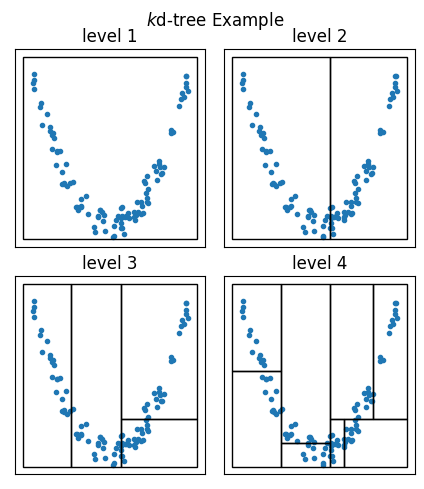

In [96]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
# if "setup_text_plots" not in globals():
#     from astroML.plotting import setup_text_plots
# setup_text_plots(fontsize=8, usetex=True)


# We'll create a KDTree class which will recursively subdivide the
# space into rectangular regions.  Note that this is just an example
# and shouldn't be used for real computation; instead use the optimized
# code in scipy.spatial.cKDTree or sklearn.neighbors.BallTree
class KDTree:
    """Simple KD tree class"""

    # class initialization function
    def __init__(self, data, mins, maxs):
        self.data = np.asarray(data)

        # data should be two-dimensional
        assert self.data.shape[1] == 2

        if mins is None:
            mins = data.min(0)
        if maxs is None:
            maxs = data.max(0)

        self.mins = np.asarray(mins)
        self.maxs = np.asarray(maxs)
        self.sizes = self.maxs - self.mins

        self.child1 = None
        self.child2 = None

        if len(data) > 1:
            # sort on the dimension with the largest spread
            largest_dim = np.argmax(self.sizes)
            i_sort = np.argsort(self.data[:, largest_dim])
            self.data[:] = self.data[i_sort, :]

            # find split point
            N = self.data.shape[0]
            half_N = int(N / 2)
            split_point = 0.5 * (self.data[half_N, largest_dim]
                                 + self.data[half_N - 1, largest_dim])

            # create subnodes
            mins1 = self.mins.copy()
            mins1[largest_dim] = split_point
            maxs2 = self.maxs.copy()
            maxs2[largest_dim] = split_point

            # Recursively build a KD-tree on each sub-node
            self.child1 = KDTree(self.data[half_N:], mins1, self.maxs)
            self.child2 = KDTree(self.data[:half_N], self.mins, maxs2)

    def draw_rectangle(self, ax, depth=None):
        """Recursively plot a visualization of the KD tree region"""
        if depth == 0:
            rect = plt.Rectangle(self.mins, *self.sizes, ec='k', fc='none')
            ax.add_patch(rect)

        if self.child1 is not None:
            if depth is None:
                self.child1.draw_rectangle(ax)
                self.child2.draw_rectangle(ax)
            elif depth > 0:
                self.child1.draw_rectangle(ax, depth - 1)
                self.child2.draw_rectangle(ax, depth - 1)


#------------------------------------------------------------
# Create a set of structured random points in two dimensions
np.random.seed(0)

X = np.random.random((100, 2)) * 2 - 1
X[:, 1] *= 0.1
X[:, 1] += X[:, 0] ** 2

#------------------------------------------------------------
# Use our KD Tree class to recursively divide the space
KDT = KDTree(X, [-1.1, -0.1], [1.1, 1.1])

#------------------------------------------------------------
# Plot four different levels of the KD tree
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(wspace=0.1, hspace=0.15,
                    left=0.1, right=0.9,
                    bottom=0.05, top=0.9)

for level in range(1, 5):
    ax = fig.add_subplot(2, 2, level, xticks=[], yticks=[])
    ax.scatter(X[:, 0], X[:, 1], s=9)
    KDT.draw_rectangle(ax, depth=level - 1)

    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-0.15, 1.15)
    ax.set_title('level %i' % level)

# suptitle() adds a title to the entire figure
fig.suptitle('$k$d-tree Example')


In [97]:
print(X.shape)

(100, 2)
